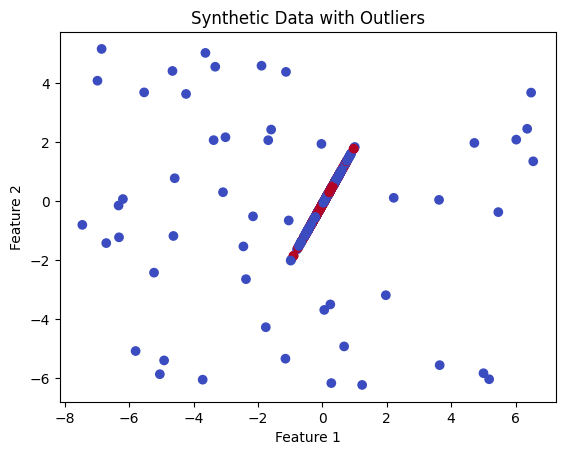

In [3]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with more features (e.g., n_features=5)
X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_clusters_per_class=1, random_state=42)

# Introduce outliers
outliers = np.random.uniform(low=-10, high=10, size=(50, 5))  # Create 50 outliers with 5 features
X = np.vstack([X, outliers])
y = np.hstack([y, np.zeros(50)])  # Label outliers as 0

# Normalize the data (Z-score normalization)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Plot the data (without outliers)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap='coolwarm', marker='o')
plt.title("Synthetic Data with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


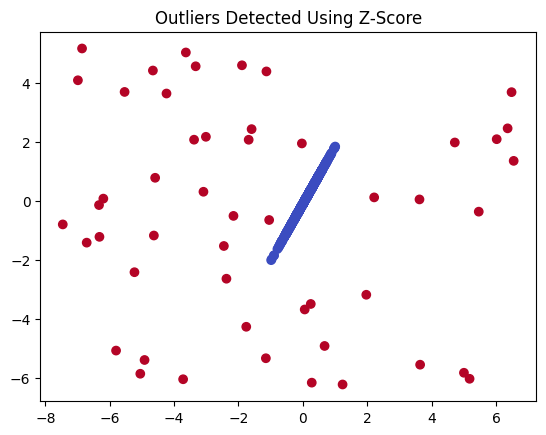

In [4]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(X_normalized))

# Define a threshold (e.g., 3 standard deviations)
threshold = 3
outliers_zscore = (z_scores > threshold).any(axis=1)

# Visualize detected outliers
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=outliers_zscore, cmap='coolwarm', marker='o')
plt.title("Outliers Detected Using Z-Score")
plt.show()


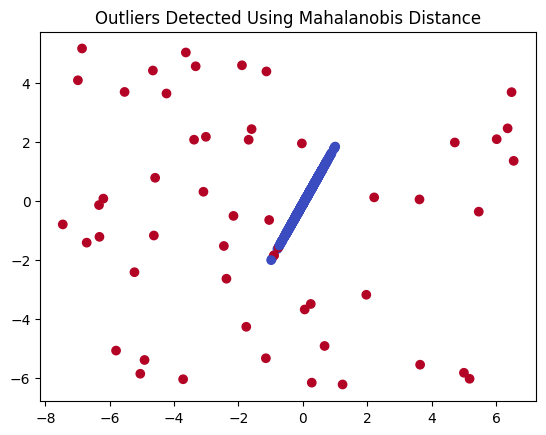

In [5]:
from scipy.spatial import distance
from numpy.linalg import inv

# Compute the covariance matrix and its inverse
cov_matrix = np.cov(X_normalized.T)
cov_matrix_inv = inv(cov_matrix)

# Compute Mahalanobis distance
mahal_dist = [distance.mahalanobis(x, np.mean(X_normalized, axis=0), cov_matrix_inv) for x in X_normalized]

# Set a threshold for outliers (based on chi-squared distribution)
threshold_mahal = np.percentile(mahal_dist, 95)
outliers_mahal = np.array(mahal_dist) > threshold_mahal

# Visualize detected outliers
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=outliers_mahal, cmap='coolwarm', marker='o')
plt.title("Outliers Detected Using Mahalanobis Distance")
plt.show()


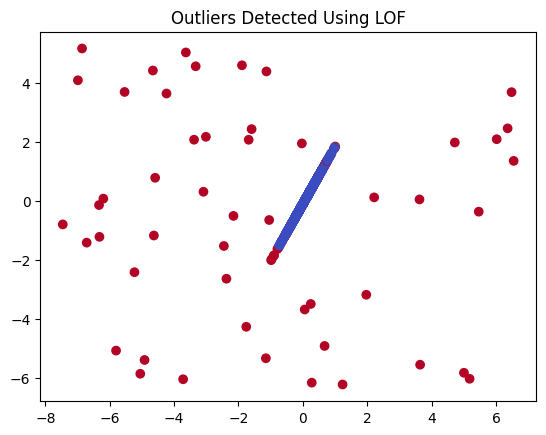

In [6]:
from sklearn.neighbors import LocalOutlierFactor

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20)
outliers_lof = lof.fit_predict(X_normalized)
outliers_lof = outliers_lof == -1  # LOF assigns -1 to outliers

# Visualize detected outliers
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=outliers_lof, cmap='coolwarm', marker='o')
plt.title("Outliers Detected Using LOF")
plt.show()


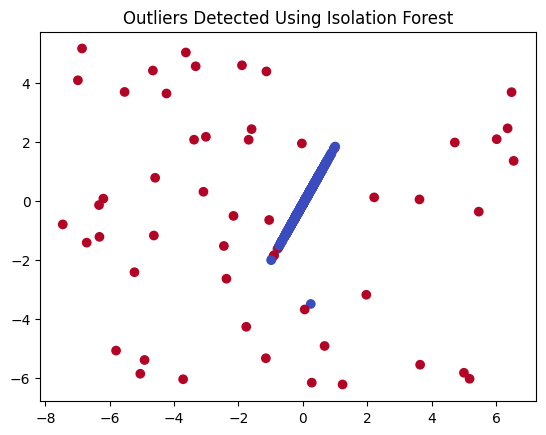

In [7]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers_iforest = iso_forest.fit_predict(X_normalized)
outliers_iforest = outliers_iforest == -1

# Visualize detected outliers
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=outliers_iforest, cmap='coolwarm', marker='o')
plt.title("Outliers Detected Using Isolation Forest")
plt.show()


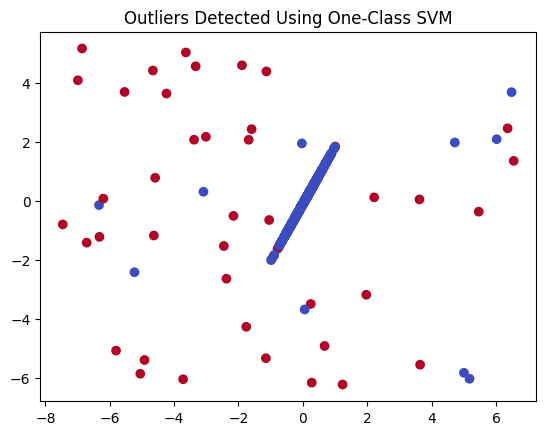

In [8]:
from sklearn.svm import OneClassSVM

# Apply One-Class SVM
svm = OneClassSVM(gamma='auto', nu=0.05)
outliers_svm = svm.fit_predict(X_normalized)
outliers_svm = outliers_svm == -1

# Visualize detected outliers
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=outliers_svm, cmap='coolwarm', marker='o')
plt.title("Outliers Detected Using One-Class SVM")
plt.show()


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compare performance metrics for each method
metrics = {}

# Z-Score
metrics['Z-Score'] = {
    'accuracy': accuracy_score(y, outliers_zscore),
    'precision': precision_score(y, outliers_zscore),
    'recall': recall_score(y, outliers_zscore),
    'f1_score': f1_score(y, outliers_zscore)
}

# Mahalanobis Distance
metrics['Mahalanobis'] = {
    'accuracy': accuracy_score(y, outliers_mahal),
    'precision': precision_score(y, outliers_mahal),
    'recall': recall_score(y, outliers_mahal),
    'f1_score': f1_score(y, outliers_mahal)
}

# LOF
metrics['LOF'] = {
    'accuracy': accuracy_score(y, outliers_lof),
    'precision': precision_score(y, outliers_lof),
    'recall': recall_score(y, outliers_lof),
    'f1_score': f1_score(y, outliers_lof)
}

# Isolation Forest
metrics['Isolation Forest'] = {
    'accuracy': accuracy_score(y, outliers_iforest),
    'precision': precision_score(y, outliers_iforest),
    'recall': recall_score(y, outliers_iforest),
    'f1_score': f1_score(y, outliers_iforest)
}

# One-Class SVM
metrics['One-Class SVM'] = {
    'accuracy': accuracy_score(y, outliers_svm),
    'precision': precision_score(y, outliers_svm),
    'recall': recall_score(y, outliers_svm),
    'f1_score': f1_score(y, outliers_svm)
}

# Print comparison table
import pandas as pd
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


                  accuracy  precision    recall  f1_score
Z-Score           0.478095   0.000000  0.000000  0.000000
Mahalanobis       0.480952   0.056604  0.006024  0.010889
LOF               0.480952   0.235955  0.042169  0.071550
Isolation Forest  0.482857   0.075472  0.008032  0.014519
One-Class SVM     0.486667   0.063830  0.006024  0.011009
